In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Dataset preparation

In [2]:
X, Y= make_blobs(  n_samples=500,
    n_features=2,
    centers=5,
    random_state=3,)


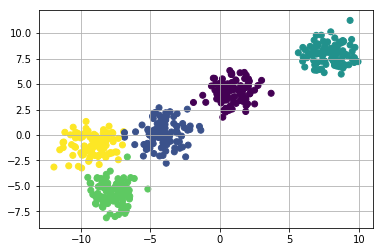

In [3]:
plt.figure(0)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.grid(True)
plt.show()

In [4]:
center = 10*(2*np.random.random((X.shape[1],) )-1)
print(center)

[ 1.39676997 -9.00590533]


In [5]:
k= 5 # numbers of centers
color = ["green", "blue", "yellow","red", "purple"]

clusters= {}

for ix in range(k):
    points =[]
    center= 10*(2*np.random.random((X.shape[1],))-1)
    
    cluster= {
        "points":points,
        "center":center,
        "color":color[ix]
    }
    clusters[ix]= cluster
print(clusters)
    
    

{0: {'points': [], 'center': array([3.69426052, 3.4688954 ]), 'color': 'green'}, 1: {'points': [], 'center': array([9.15143798, 1.23537394]), 'color': 'blue'}, 2: {'points': [], 'center': array([ 7.17557863, -1.5058351 ]), 'color': 'yellow'}, 3: {'points': [], 'center': array([-6.4373108, -1.745939 ]), 'color': 'red'}, 4: {'points': [], 'center': array([3.13168291, 7.15318326]), 'color': 'purple'}}


In [6]:
def dist(v1, v2):
    v1= np.array(v1)
    v2 = np.array(v2)
    dis= np.sqrt(np.sum((v1-v2)**2))
    return dis


In [7]:
#Assign every data point to one of the clusters
def AssignPointToClusters(clusters):# E-step -E stands for expectation
    for i in range(X.shape[0]): 
        dis_list = []
        for ix in range(k):
            dis= dist(X[i],clusters[ix]["center"] )
            dis_list.append(dis)
        least= np.argmin(dis_list)
        clusters[least]["points"].append(X[i])


In [8]:
def UpdateCluster(clusters): #M-step - Here M stands for maximization
    for i in range(k):
        pts= np.array(clusters[i]["points"])
        if(pts.shape[0]>0): #update only if the number of points in it are more than 0 
            new_c= np.mean(pts, axis = 0 )
            clusters[i]["center"]= new_c
            clusters[i]["points"] = []
        
def PlotCluster(clusters):
    for i in range(k):
        pts= np.array(clusters[i]["points"])
        
        try:
            plt.scatter(pts[:,0],pts[:,1], color= clusters[i]["color"])
       
        except:
            pass
        plt.scatter(clusters[i]["center"][0],clusters[i]["center"][1], color= "black",marker="*")


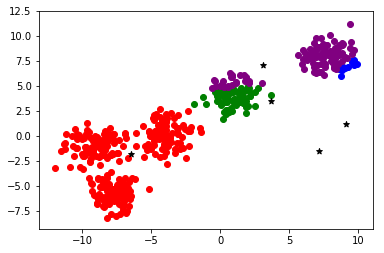

In [9]:
AssignPointToClusters(clusters)
PlotCluster(clusters)
UpdateCluster(clusters)

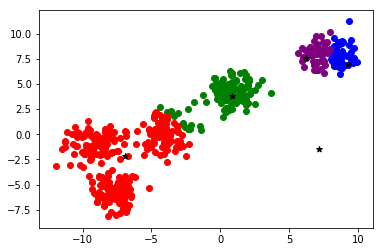

In [10]:
AssignPointToClusters(clusters)
PlotCluster(clusters)
UpdateCluster(clusters)

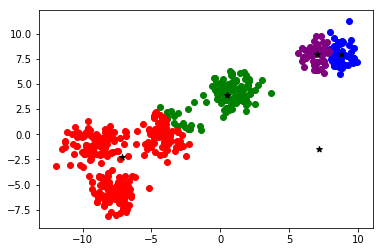

In [11]:
AssignPointToClusters(clusters)
PlotCluster(clusters)
UpdateCluster(clusters)

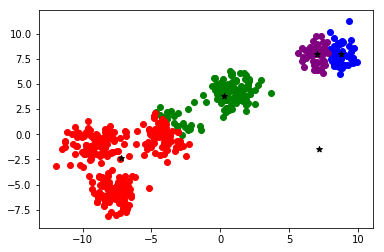

In [12]:
AssignPointToClusters(clusters)
PlotCluster(clusters)
UpdateCluster(clusters)

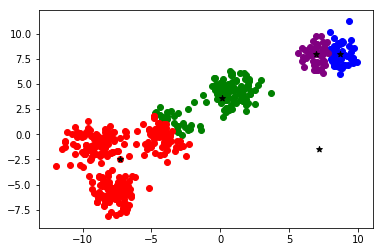

In [13]:
AssignPointToClusters(clusters)
PlotCluster(clusters)
UpdateCluster(clusters)

- As we can see that k-means can also be wrong, hence an improvement on k-means to initialize the centers better is k-means++